# Cifar 10 Classifier

The goal of this classifier is to establish baseline metrics. The following code can be used to train a German traffic sign classifier. Even though there are 43 classes of German traffic signs and only 10 classes of Cifar10 images, this classifier will perform significantly worse in terms of accuracy. Cifar10 images vary much more greatly than traffic signs. The difference between a ship and a frog is much greater than the difference between a "70 km/h" sign and a "Pedestrians" sign.

Note that the training accuracy is lower than the validation accuracy for the same epoch because the validation accuracy is obtained with the model at the end of an epoch whereas the training accuracy is the running average accuracy during an epoch. In other words, as the model is optimizing loss, it's getting better and better.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import numpy as np
import pickle
from skimage import color
from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify = y_train)

print("Loaded data")

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

num_image_channels = X_train.shape[-1]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of image channels =", num_image_channels)

Loaded data
Number of training examples = 35000
Number of validation examples = 15000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10
Number of image channels = 3


# Data preprocessing

In [3]:
X_train = X_train.astype(np.float64)

mean_image = np.mean(X_train, axis=0, dtype=np.float64)
X_train_stddev = np.std(X_train)

X_train -= mean_image
X_train /= X_train_stddev

X_valid = X_valid.astype(np.float64)
X_valid -= mean_image
X_valid /= X_train_stddev

X_test = X_test.astype(np.float64)
X_test -= mean_image
X_test /= X_train_stddev

print("Normalized train, validation, and test datasets.")

Normalized train, validation, and test datasets.


In [ ]:
from keras import utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers
from keras import callbacks
from sklearn.utils import shuffle

epochs = 10
droprate = 0.5
conv1_nfilters = 12
conv2_nfilters = 32
fc1_nodes = 120
fc2_nodes = 84
activation = 'relu'

model = Sequential()
model.add(Conv2D(filters=conv1_nfilters, kernel_size=(5, 5), input_shape=(32, 32, 3)))
model.add(Activation(activation))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(droprate))
model.add(Conv2D(filters=conv2_nfilters, kernel_size=(5, 5)))
model.add(Activation(activation))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(droprate))
model.add(Flatten())
model.add(Dense(fc1_nodes))
model.add(Activation(activation))
model.add(Dropout(droprate))
model.add(Dense(fc2_nodes))
model.add(Activation(activation))
model.add(Dropout(droprate))
model.add(Dense(n_classes, activation='softmax'))

epoch_end = {}
epoch_end['train_loss'] = []
epoch_end['train_acc'] = []

class TrainCallback(callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        epoch_end['train_loss'].append(loss)
        epoch_end['train_acc'].append(acc)
        print('\nEpoch end loss: {}, acc: {}\n'.format(loss, acc))
        
y_one_hot = utils.to_categorical(y_train, n_classes)
y_valid_one_hot = utils.to_categorical(y_valid, n_classes)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_one_hot, batch_size=128, epochs=epochs, validation_data=(X_valid, y_valid_one_hot))
#                    callbacks=[TrainCallback((X_train, y_one_hot))])
        
score = model.evaluate(X_train, y_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 30s - loss: 2.1395 - acc: 0.1861 - val_loss: 1.9039 - val_acc: 0.3349
Epoch 2/10
35000/35000 [==============================] - 30s - loss: 1.8254 - acc: 0.3095 - val_loss: 1.6744 - val_acc: 0.4077
Epoch 3/10
35000/35000 [==============================] - 30s - loss: 1.7020 - acc: 0.3624 - val_loss: 1.5823 - val_acc: 0.4308
Epoch 4/10
35000/35000 [==============================] - 30s - loss: 1.6244 - acc: 0.4013 - val_loss: 1.5407 - val_acc: 0.4484
Epoch 5/10
35000/35000 [==============================] - 29s - loss: 1.5693 - acc: 0.4267 - val_loss: 1.4122 - val_acc: 0.4938
Epoch 6/10
35000/35000 [==============================] - 29s - loss: 1.5329 - acc: 0.4404 - val_loss: 1.4020 - val_acc: 0.5028
Epoch 7/10
35000/35000 [==============================] - 16711s - loss: 1.4972 - acc: 0.4565 - val_loss: 1.3428 - val_acc: 0.5203
Epoch 8/10
35000/35000 [===========================

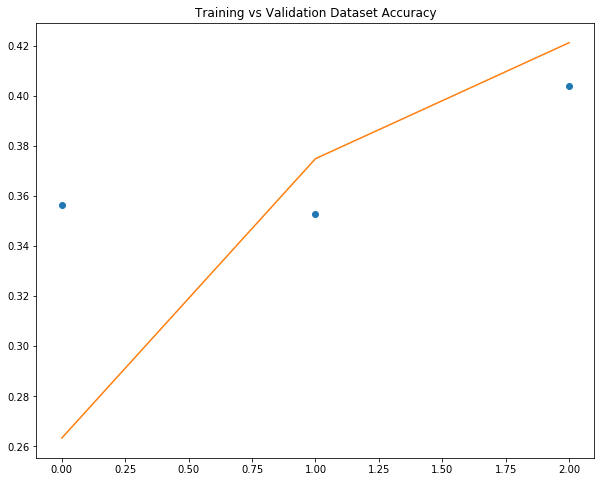

In [7]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Why is training accuracy lower than validation accuracy?
# Training accuracy is the average of accuracies of all batches during an epoch.
# Validation accuracy is the accuracy of the entire dataset.
# See https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss
plt.plot(history.history['val_acc'], 'o', label='baseline') 
plt.plot(history.history['acc'], '-', label='baseline') # This is the avg training acc for each batch
plt.plot(epoch_end['train_acc'], 'x', label='baseline') # This is the training acc at the end of an epoch.
plt.title("Training vs Validation Dataset Accuracy")

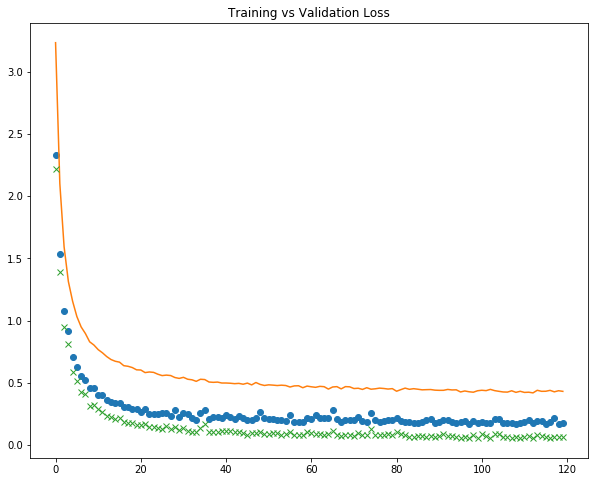

In [34]:
plt.plot(history.history['val_loss'], 'o', label='baseline')
plt.plot(history.history['loss'], '-', label='baseline')
plt.plot(epoch_end['train_loss'], 'x', label='baseline')
plt.title("Training vs Validation Loss")

In [5]:
from keras.models import load_model
model.save('model.h5')
model = load_model('model.h5')

X_test2 = np.array([mpimg.imread(filename) for filename in test_files])
y_test2 = np.array([4, 27, 30, 12, 9])

y_test_one_hot = utils.to_categorical(y_test, n_classes)
y_test2_one_hot = utils.to_categorical(y_test2, n_classes)

score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(X_test2, y_test2_one_hot, verbose=0)
print('Custom set loss:', score[0])
print('Custome set accuracy:', score[1])

Test loss: 0.512417858344
Test accuracy: 0.852969121178
Custom set loss: 5.58885097504
Custome set accuracy: 0.40000000596


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")